# Fit non ideal diode equation to light JV-curve
Version 0.0.1 (c) Vincent M. Le Corre, 2022

This notebook was written to fit dark JV-curves with the non-ideal diode equation below:

$$ J = J_{ph} - J_0\left[\exp\left(-\frac{V-R_s J}{n k_b T}\right)-1\right] - \frac{V-R_s J}{R_{sh}}$$

more information about the method used can be found in the [Solar Energy Materials & Solar Cells 81 (2004) 269–277](https://doi.org/10.1016/j.solmat.2003.11.018).

In [1]:
# Package import
#%matplotlib notebook # switch this on when on JupyterHub
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import homemade package by VLC
from core.DiodeFit_func import *

### Load experimental data
To ensure that the fit make sense please only use SI units and make sure that the current is negative and voltage positive for the power generating regime.


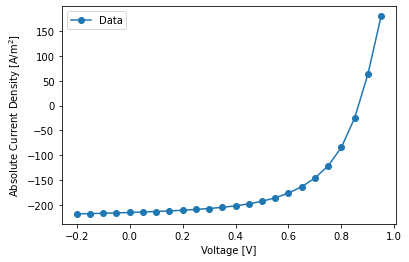

In [2]:
FolderName = 'test/data'
filename = 'PM6Y6_1.00e+00sun_t_0.000000E+0.txt'

df = pd.read_csv(os.path.join(FolderName,filename),delim_whitespace=True)
V = np.asarray(df['V']) # voltage in V
J = np.asarray(df['J']) # current density in A/m2 , use SI unit! if data is not in SI please make the necessary conversion.

plt.plot(V,J,'-o')
plt.xlabel('Voltage [V]')
plt.ylabel('Absolute Current Density [A/m$^2$]')
plt.legend(['Data'])
plt.show()

### Fit non ideal diode equation to dark JV-curves

R_s =  0.00022347699048293147 +/- 5.228398099759938e-05 [Ohm m^2]
R_sh =  0.021997251582044155 +/- 0.0032410772809836792 [Ohm m^2]
J0 =  0.001 +/- 0.0018648738154732121 [A/m^2]
n =  2.7582632408483283 +/- 0.4255508613853712
Jph =  217.6818040756591 +/- 2.0857055165814193 [A/m^2]


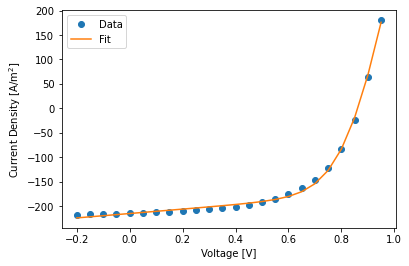

In [3]:
# Fit the non ideal diode equation
# using the take_log = False option leads to better results for the fit
res = FitNonIdealDiode(V,J,T=298.15,JV_type='light',take_log=False) 

# Fitting results
print('R_s = ',res['Rs'],'+/-',res['Rs_err'],'[Ohm m^2]')
print('R_sh = ',res['Rsh'],'+/-',res['Rsh_err'],'[Ohm m^2]')
print('J0 = ',res['J0'],'+/-',res['J0_err'],'[A/m^2]')
print('n = ',res['n'],'+/-',res['n_err'])
print('Jph = ',res['Jph'],'+/-',res['Jph_err'],'[A/m^2]')

plt.plot(V,J,'o')
plt.plot(V,NonIdealDiode_light(V,res['J0'],res['n'],res['Rs'],res['Rsh'],res['Jph']))

plt.xlabel('Voltage [V]')
plt.ylabel('Current Density [A/m$^2$]')

plt.legend(['Data','Fit'])
plt.show()
